# CUNY DATA 620
Michael Gankhuyag

# Assignment 8
Perform an analysis of high frequency words in a corpus of interest.

Complete the following tasks:

Choose a corpus of interest.
How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
Taking the most common words, how many unique words represent half of the total words in the corpus?
Identify the 200 highest frequency words in this corpus.
Create a graph that shows the relative frequency of these 200 words.
Does the observed relative frequency of these words follow Zipf’s law? Explain.
In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [75]:
#Import Packages
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections

For my corpus of interest I picked an LLC Agreement from the State of California. This is particularly of interest to me because I have goals to start my own business and live in California. I will find the most common words in this document to know what I should expect in the future.

In [16]:
import sys
sys.path.append(r'C:\Users\User\Desktop\MSDS\DATA620')

In [34]:
#Read the LLC Agreement
f = open('california-llc-operating-agreement-template.txt')
raw = f.read()

In [48]:
#Preview LLC Agreement
raw

"LIMITED LIABILITY COMPANY OPERATING AGREEMENT\nOF\n_______________________, LLC\n\nPursuant to § 17701.10\n\nFORMED IN THE STATE OF CALIFORNIA\t\n\nThis Agreement, entered into on ______________, 20____, is a \n\n(Check One)\n\n? - SINGLE-MEMBER LLC OPERATING AGREEMENT, entered into by and between _________________, LLC, a ___________________________ (State) LLC (the “Company”) and ______________________________ of _________________________(Address), hereinafter known as the “Member”\n\n? - MULTI-MEMBER LLC OPERATING AGREEMENT, entered into by and between _____________________________, of ____________________________ (Address),\n_____________________________, of_____________________________ (Address),\n_____________________________, of _____________________________(Address), hereinafter known as the “Members”\n\n\tWHEREAS the Member(s) desire to create a limited liability company under the laws of the State of California and set forth the terms herein of the Company’s operation and th

In [46]:
#Download necessary packages to analyze text
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data] 

[nltk_data]    |   Unzipping corpora\pros_cons.zip.
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\qc.zip.
[nltk_data]    | Downloading package reuters to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package rte to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\rte.zip.
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\senseval.zip.
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\sentiwordnet.zip.
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\U

[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping stemmers\porter_test.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping misc\mwa_ppdb.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all


True

In [124]:
#List all words in the agreement
llc = nltk.word_tokenize(raw)

In [127]:
#Clean the data by removing punctuations and stop words

#strip out stopwords from agreement
from nltk.corpus import stopwords
llc = [x for x in llc if x not in stopwords.words('english')]

#strip out punctuations from agreement
llc = [x for x in llc if x.isalpha()]

# Total Unique words in the corpus

In [128]:
#Total words
len(llc)

3640

In [129]:
#Unique words
llc_unique = set(llc)
len(llc_unique)

1058

In [130]:
#Calculate how many unique words represent the total number of words
len(llc_unique)/len(llc)

0.2906593406593407

# Unique words over total words 
Unique words represent roughly 29% of the total words in the agreement.This means that 71% of the document uses the repeated words and the language style is repeated across the document.

# Identify the 200 highest frequency words

In [108]:
#Get Frequency of words in document
llc_common = nltk.FreqDist(llc)

#top 200 words
llc_common2 = pd.DataFrame(llc_top.most_common(200), columns = ['Words','Frequency'])

In [117]:
#Preview 5 words
llc_common2.head()

,Words,Frequency
0,Company,172
1,Member,151
2,shall,142
3,Members,100
4,may,55


# Create a graph that shows the relative frequency

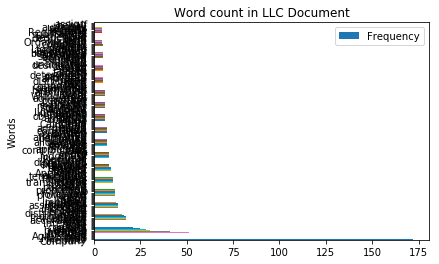

In [110]:
#Chart out top 200 words
llc_common2.plot.barh(x = 'Words', y = 'Frequency', rot = 1)
plt.title("Word count in a LLC Document")
plt.show()


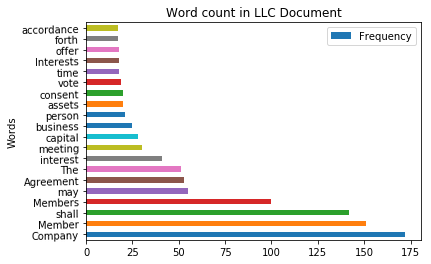

In [111]:
#chart out top 20 words from graph
llc_common_top20 = llc_common2.head(20)
llc_common_top20.plot.barh(x = 'Words', y = 'Frequency', rot = 1)
plt.title("Word count in a LLC Document")
plt.show()

# Zipf's law

Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n.

In our case, no this observation does not follows zipf's law it looks like top 4 words are relativly close in frequency. There is a large gap between the top several words and the bottom half.
